## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [5]:
your_name = "Hatim Hussaini"
your_student_id = "47807040"

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [9]:
car = pd.read_csv('/Users/hatimhussaini/Downloads/Github Repository/2.portfolio-part-2-hatimhussaini/Portfolio part 2 resources-20240827/car_sells_clean_data.csv')
print(len(car))
print(car.shape)

3657
(3657, 8)


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [11]:
car.head()
car.info()
car.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


,year,selling_price,km_driven
count,3657.000000,3.657000e+03,3657.000000
mean,2013.123599,4.945088e+05,66560.660924
std,4.119128,5.579230e+05,47007.819292
min,1995.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [109]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
car[['name','fuel','seller_type','transmission','owner']] = ordinal_encoder.fit_transform(
    car[['name','fuel','seller_type','transmission','owner']])
car.head()

corr_car = car.corr()
corr_car['selling_price']

name            -0.098498
year             0.411103
selling_price    1.000000
km_driven       -0.177203
fuel            -0.277627
seller_type     -0.208637
transmission    -0.522501
owner           -0.205524
Name: selling_price, dtype: float64

#### Analysis:
The "Selling Price" column's correlation variable with every other column in the dataframe is shown above. Correlation values range from 1 to -1 where a value closer to either end indicate a strong positive (directly proportional relationship) or negative (inversely proportional relationship) correlation. The closer a value is to 0, the weaker the correlation as shown by the correlation between selling price and name of the car at -0.098, signalling virtually no relationship whatsoever.  
- **The most correlated feature** to selling price is that of **transmission** with a correlation value of -0.523. This means that cars with different transmission types (automatic vs. manual) have a significant effect on the selling price. In this dataframe, manual transmissions might be associated with higher prices.  
- **Year** is a close second in terms of correlation (0.411) with a directly proportional realtionship with selling price suggesting that as newer cars tend to sell for a higher price. This is a perfectly logical conclusion.
- On the other hand, **the least correlated feature** (excluding name) is of **km_driven** (-0.177) highlighting that even though there is a slight decrease in selling price when kilomnetre driven increases, its impact pales in comparision to other features.

As transmission and year have a strong correlation with selling price, these features will heavily effect a regression model for selling price and will carry the most amount of weight. This is because these variables have relatively larger change when selling price changes.  

Alternatively, a regression model for selling price trained on kilometres driven will not contribute much to the prediction and the accuracy of the model will be way off. Even though adding this feature to our prediction model may not harm the performance, it does not make it much better either.

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [114]:
train_case_1, test_case_1 = train_test_split(car, test_size=0.9, random_state=142)
print(train_case_1.shape)
print(test_case_1.shape)

(365, 8)
(3292, 8)


In [144]:
train_case_2, test_case_2 = train_test_split(car, test_size=0.1, random_state=142)
print(train_case_2.shape)
print(test_case_2.shape)

(3291, 8)
(366, 8)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [244]:
#Model A
import math
most_correlated = ['transmission', 'year']
least_correlated = ['owner','km_driven']

model_a = linear_model.LinearRegression()
x_train_case_1a= train_case_1[most_correlated]
y_train_case_1a = train_case_1['selling_price']
x_test_case_1a= test_case_1[most_correlated]
y_test_case_1a = test_case_1['selling_price']
reg.fit(x_train_case_1a, y_train_case_1a)
print("y = x1 *", reg.coef_[0], "+ x2 *",reg.coef_[1],"+", reg.intercept_)

train_case_1a_pred =reg.predict(x_train_case_1a)
test_case_1a_pred = reg.predict(x_test_case_1a)



y = x1 * -1094599.081070911 + x2 * 52083.56421830386 + -103335111.19052878


In [246]:
#Model B
model_b = linear_model.LinearRegression()
x_train_case_1b= train_case_1[least_correlated]
y_train_case_1b = train_case_1['selling_price']
x_test_case_1b= test_case_1[least_correlated]
y_test_case_1b = test_case_1['selling_price']
reg.fit(x_train_case_1b, y_train_case_1b)
print("y = x1 *", reg.coef_[0], "+ x2 *",reg.coef_[1],"+", reg.intercept_)

train_case_1b_pred =reg.predict(x_train_case_1b)
test_case_1b_pred = reg.predict(x_test_case_1b)



y = x1 * -113002.63397763736 + x2 * -2.9985474491552546 + 772525.8919347306


In [248]:
#Model C
model_c = linear_model.LinearRegression()
x_train_case_2c= train_case_2[most_correlated]
y_train_case_2c = train_case_2['selling_price']
x_test_case_2c= test_case_2[most_correlated]
y_test_case_2c = test_case_2['selling_price']
reg.fit(x_train_case_2c, y_train_case_2c)
print("y = x1 *", reg.coef_[0], "+ x2 *",reg.coef_[1],"+", reg.intercept_)

train_case_2c_pred =reg.predict(x_train_case_2c)
test_case_2c_pred = reg.predict(x_test_case_2c)



y = x1 * -873349.4149664732 + x2 * 46875.99964482609 + -93089360.68494889


In [250]:
#Model D
model_d = linear_model.LinearRegression()
x_train_case_2d= train_case_2[least_correlated]
y_train_case_2d = train_case_2['selling_price']
x_test_case_2d= test_case_2[least_correlated]
y_test_case_2d = test_case_2['selling_price']
reg.fit(x_train_case_2d, y_train_case_2d)
print("y = x1 *", reg.coef_[0], "+ x2 *",reg.coef_[1],"+", reg.intercept_)

train_case_2d_pred =reg.predict(x_train_case_2d)
test_case_2d_pred = reg.predict(x_test_case_2d)



y = x1 * -159106.58621657363 + x2 * -1.4095951629238914 + 655857.9301921412


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [205]:
print('Model A Training MSE:',mean_squared_error(y_train_case_1a,train_case_1a_pred))
print('Model A Training Root MSE:',math.sqrt(mean_squared_error(y_train_case_1a,train_case_1a_pred)))
print('Model A Training R Squared:',r2_score(y_train_case_1a,train_case_1a_pred))

print('Model A Test MSE:',mean_squared_error(y_test_case_1a,test_case_1a_pred))
print('Model A Test Root MSE:',math.sqrt(mean_squared_error(y_test_case_1a,test_case_1a_pred)))
print('Model A Test R Squared:',r2_score(y_test_case_1a,test_case_1a_pred))

Model A Training MSE: 205686709569.31143
Model A Training Root MSE: 453526.96674984106
Model A Training R Squared: 0.4682018622012789
Model A Test MSE: 196798886091.6768
Model A Test Root MSE: 443620.2047829616
Model A Test R Squared: 0.3499469902988702


In [207]:
print('Model B Training MSE:',mean_squared_error(y_train_case_1b,train_case_1b_pred))
print('Model B Training Root MSE:',math.sqrt(mean_squared_error(y_train_case_1b,train_case_1b_pred)))
print('Model B Training R Squared:',r2_score(y_train_case_1b,train_case_1b_pred))

print('Model B Test MSE:',mean_squared_error(y_test_case_1b,test_case_1b_pred))
print('Model B Test Root MSE:',math.sqrt(mean_squared_error(y_test_case_1b,test_case_1b_pred)))
print('Model B Test R Squared:',r2_score(y_test_case_1b,test_case_1b_pred))

Model B Training MSE: 356617064277.997
Model B Training Root MSE: 597174.232764607
Model B Training R Squared: 0.07797498881968956
Model B Test MSE: 292715789614.6963
Model B Test Root MSE: 541032.152108076
Model B Test R Squared: 0.033120645116682


In [209]:
print('Model C Training MSE:',mean_squared_error(y_train_case_2c,train_case_2c_pred))
print('Model C Training Root MSE:',math.sqrt(mean_squared_error(y_train_case_2c,train_case_2c_pred)))
print('Model C Training R Squared:',r2_score(y_train_case_2c,train_case_2c_pred))

print('Model C Test MSE:',mean_squared_error(y_test_case_2c,test_case_2c_pred))
print('Model C Test Root MSE:',math.sqrt(mean_squared_error(y_test_case_2c,test_case_2c_pred)))
print('Model C Test R Squared:',r2_score(y_test_case_2c,test_case_2c_pred))

Model C Training MSE: 194779853922.9337
Model C Training Root MSE: 441338.70657685766
Model C Training R Squared: 0.38714185302913284
Model C Test MSE: 149898364537.47766
Model C Test Root MSE: 387167.1015691773
Model C Test R Squared: 0.4040398435674952


In [211]:
print('Model D Training MSE:',mean_squared_error(y_train_case_2d,train_case_2d_pred))
print('Model D Training Root MSE:',math.sqrt(mean_squared_error(y_train_case_2d,train_case_2d_pred)))
print('Model D Training R Squared:',r2_score(y_train_case_2d,train_case_2d_pred))

print('Model D Test MSE:',mean_squared_error(y_test_case_2d,test_case_2d_pred))
print('Model D Test Root MSE:',math.sqrt(mean_squared_error(y_test_case_2d,test_case_2d_pred)))
print('Model D Test R Squared:',r2_score(y_test_case_2d,test_case_2d_pred))

Model D Training MSE: 299365728362.4965
Model D Training Root MSE: 547143.2430017723
Model D Training R Squared: 0.05807134641648015
Model D Test MSE: 241892693210.42822
Model D Test Root MSE: 491825.8769223395
Model D Test R Squared: 0.038292327402116855


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [252]:
#sort the answers into variables to plot it through mathplotlib

models = ['Model A', 'Model B', 'Model C', 'Model D']
train_mse = [205686709569.31143, 356617064277.997, 194779853922.9337, 299365728362.4965]
train_rmse = [453526.96674984106, 597174.232764607, 441338.70657685766, 547143.2430017723]
train_r2 = [0.4682018622012789, 0.07797498881968956, 0.38714185302913284, 0.05807134641648015]

test_mse = [196798886091.6768, 292715789614.6963, 149898364537.47766, 241892693210.42822]
test_rmse = [443620.2047829616, 541032.152108076, 387167.1015691773, 491825.8769223395]
test_r2 = [0.3499469902988702, 0.033120645116682, 0.4040398435674952, 0.038292327402116855]

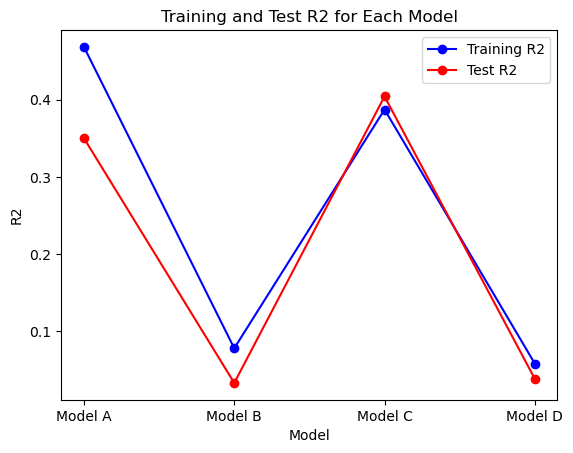

In [281]:
## plt.figure(figsize=(8, 4))
plt.plot(models, train_r2, label='Training R2', marker = 'o', color='blue')
plt.plot(models, test_r2, label='Test R2', marker = 'o', color='red')

plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Training and Test R2 for Each Model')
plt.legend()

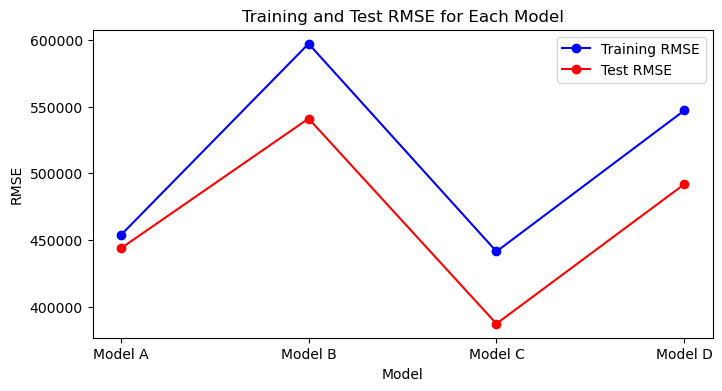

In [286]:
plt.figure(figsize=(8, 4))
plt.plot(models, train_rmse, marker='o', label='Training RMSE', color='blue')
plt.plot(models, test_rmse, marker='o', label='Test RMSE', color='red')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE for Each Model')
plt.legend()

#### Regression Model Analysis :   
I have trained 4 different regression models (Model A, B, C and D) where A and B have been trained on 10% of the whole dataset and conducted tests on the remainder of the 90% while models C and D are trained on 90% of the data and tested for accuracy on the remainder of the 10%. Furthermore, models A and C have been trained using transmission and year features; the two features with the highest correlation with selling price. Models B and D are trained using kilometres driven and owner features as they are the least correlated features in relation to selling price. i used these models to find out the **Mean Squared Error (MSE)** , **Root of Mean Squared Error (RMSE)** and the **$R^2$** values of all the 4 models and plotted them on line graphs for better visualisation of the data.  

**MSE** measures the average squared difference between the actual and predicted MPG values. Lower MSE indicates better model performance. As the MSE values were really high, I had to calculate the RMSE to scale down the numbers for better understanding. The line graph for training and test RMSE values for all four models depict that model C has the lowest training and test RMSE out of all the 4 models followed by model A. This could be due to the fact that model C was trained o 90% of the data and is also trained on the most correlated features thus making up the most robust predictor out of the four models. Model A is a close second due to it being trained on only 10% of the data. on the other hand, the RMSE for Models B and D is high, indicating that the models perform poorly on the data. This reinforces the  assumption that  models, using less correlated features, do not predict well.


**$R^2$** indicates how well the independent variables explain the variability in the dependent variable (selling_price). An $R^2$ score closer to 1 means a better fit. When $R^2$ is multiplied by 100, it gives us the percentage of how much of the dependant variable's value can be explained by the independent features of the model e.g transmission and year. The line plot above compares the $R^2$ values of each of the 4 models and the superiority of models A and C can be observed. The training $R^2$ value of model A is better than rest of the models but model C's test $R^2$ value shows that it generalizes to unseen data better than any other model. Models B and D have much lower $R^2$ values in comparision. The common factor between these models and the reason they have low $R^2$ values is attributed to the fact that they are trained on least correlated features and do not explain much of the variance in selling price. 

Normally, we would expect models trained on features most correlated with the dependant variable to perform better, and this is exactly the case in this excersise as well. Models trained on ample data perform well in general compared to models trained on little data (model C,D vs model A,B) and models trained on highly correlated features perform well against models with less correlated features (Model A,C vs Model B,D). These findings demonstrate how using relevant features and enough training data cam help build accurate predictive models. Correct selection and a large enough training set can help better a model's ability to predict outcomes.

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


##### Analysis:  

The infographics above that shows the medal counts for the 2008 Beijing Olympics. Table 1 has the countries sorted by total number of medals and table 2 has the countries sorted by the number of gold medals. These tables are shown without any context and thus raise ethical concerns due to inconsistent data presentation. The Vox article on Georgia's COVID-19 data highlights similar issues where data presentation can mislead the public. For example, Georgia was criticized for presenting data that suggested declining COVID-19 cases, possibly influencing public perception and government decisions. This shows how visualizations without clear context or consistency can mislead.  

The Viborc article emphasizes that ethical data visualization requires clarity, context, and fairness. In the case of the Olympic medal infographic, sorting by different criteria without explanation can create confusion. This inconsistency can influence how viewers interpret the data, such as favoring one country over another based on the sorting method. The article stresses that data should be presented transparently, avoiding any manipulation that could lead to misleading conclusions.  

Just like misleading COVID-19 data presentations can have serious public health issues, improperly formatted sports data can skew public perception of a country's athletic performance.